<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Proj_2_data71200class6lab_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load pizza dataset

In [2]:
from sklearn.datasets import load_wine
dataset = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_v2.csv")
print(dataset.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0         yes          yes              no  
1         yes          yes              no  
2         yes          yes             yes  
3         yes           no             yes  
4         yes           no             yes  


# Testing/Training Split

In [3]:
columns = ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
dataset = pd.concat([dataset]+[pd.get_dummies(dataset[i],drop_first=True) for i in columns],axis=1)
dataset.drop(columns,axis=1,inplace=True)
dataset.head(3)

,company,price_cad,diameter_in,black_pepper,chicken,meat,mozzarella,mushrooms,onion,pepperoni,...,super_supreme,thai_veggie,jumbo,large,medium,regular,small,yes,yes,yes
0,A,29,22.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,A,25,20.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,A,19,16.0,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


In [4]:
#predicting the company name based on certain features
y = dataset['company']
print(y)

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object


In [5]:
#dropped the features that are probably not relevant to the model
X = dataset.drop(['company'], axis=1)
print(X)

     price_cad  diameter_in  black_pepper  chicken   meat  mozzarella  \
0           29         22.0         False     True  False       False   
1           25         20.0         False    False  False       False   
2           19         16.0         False    False  False       False   
3           22         14.0         False    False  False       False   
4           30         18.0         False    False  False        True   
..         ...          ...           ...      ...    ...         ...   
124         11          8.5         False    False  False       False   
125         14         12.0         False    False  False       False   
126         17         14.0         False    False  False       False   
127         12          8.5         False    False   True       False   
128         15         12.0         False    False   True       False   

     mushrooms  onion  pepperoni  sausage  ...  super_supreme  thai_veggie  \
0        False  False      False    False  ..

In [6]:
#do testing/training split - need different code for own data b/c no .data or .target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# **K-Nearest Neighbor**

In [8]:
#import KNN clasifier and fit to training data
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.33


In [10]:
# generate list of predictions for y2_test
y_pred = knn.predict(X_test)

In [11]:
# generate a confusion matrix on pizza data - shows where model might be making mistakes
# model failing in the confusion b/w class 2 & class 3
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 5, 0],
       [0, 1, 0, 0, 5],
       [0, 0, 7, 0, 1],
       [3, 2, 0, 0, 0],
       [0, 4, 2, 0, 2]])

In [12]:
# calculate class-wise precision score on pizza data
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.25      , 0.14285714, 0.77777778, 0.        , 0.25      ])

In [13]:
# calculate class-wise recall score on iris data
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.16666667, 0.16666667, 0.875     , 0.        , 0.25      ])

In [14]:
# calculate overall and class-wise F1-score on iris data
from sklearn.metrics import f1_score

# Calculate metrics globally by counting the total true positives, false negatives and false positives.
print("F1 score of micro")
print(f1_score(y_test, y_pred, average='micro'))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print("F1 score of macro")
print(f1_score(y_test, y_pred, average='macro'))
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
print("F1 score of weighted")
print(f1_score(y_test, y_pred, average='weighted'))

# Class-wise, no averaging
print('F1 score per class')
print(f1_score(y_test, y_pred, average=None))

F1 score of micro
0.3333333333333333
F1 score of macro
0.28547511312217194
F1 score of weighted
0.3245852187028658
F1 score per class
[0.2        0.15384615 0.82352941 0.         0.25      ]


In [21]:
# calculate AUC score (ROC implementation in scikit-learn only works for binary classification) on iris data
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')

0.5626428571428571

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#best performing k (on training set)
knn_gscv.best_params_

NameError: name 'knn_gscv' is not defined

In [20]:
#accuracy of best performing k

# best k (8) performs at 0.49)
knn_gscv.best_score_

NameError: name 'knn_gscv' is not defined

# **Cross Validation Results**

In [ ]:
#cross validation results - 8 & 9th k are tied for best and 23rd k is worst performing
knn_gscv.cv_results_

# **Best Performing k**

In [ ]:
# accuracy of k = 8 on testing data
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X_train, y_train)
print("knn score: {}".format(knn13.score(X_test, y_test)))

# **Worst Performing k**

In [ ]:
# accuracy of k = 23 on testing data
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
print("knn score: {}".format(knn2.score(X_test, y_test)))

# *Worst perfomring k performs better than the best performing k*

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

In [ ]:
#try increasing max_iter
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

#assumes normally distributed data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Training set score: {:.2f}".format(gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gnb.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.61


## Testing/Training Split Evaluation

In [ ]:
# Accuracy
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Training set score: {:.2f}".format(gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gnb.score(X_test, y_test)))


Training set score: 0.62
Test set score: 0.61


In [ ]:
# # Classification Report
# #Print the classification report
# from sklearn.metrics import classification_report

# print(classification_report(y_test, gnb.predict(X_test),
#                             target_names=["class 1", "class 2","class 3"]))


In [ ]:
# Classification Report -Used gemini for assistance b/c above cell gave error - "ValueError: Number of classes, 5, does not match size of target_names, 3. Try specifying the labels parameter"
#Print the classification report
from sklearn.metrics import classification_report

# Get the unique classes from y_test
unique_classes = np.unique(y_test)

# Create target names based on unique classes
target_names = ["class {}".format(i) for i in unique_classes]

print(classification_report(y_test, gnb.predict(X_test),
                            target_names=target_names)) # Use dynamically generated target names

              precision    recall  f1-score   support

     class A       0.67      1.00      0.80         6
     class B       0.40      1.00      0.57         6
     class C       1.00      0.75      0.86         8
     class D       0.00      0.00      0.00         5
     class E       0.67      0.25      0.36         8

    accuracy                           0.61        33
   macro avg       0.55      0.60      0.52        33
weighted avg       0.60      0.61      0.55        33



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Cross Validation (from class 5 notebook)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# for n_neighbors in neighbors_settings:
#     # build the model
#     knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="brute")
#     knn.fit(X_train, y_train)
#     # record training set accuracy
#     training_accuracy.append(knn.score(X_train, y_train))
#     # record generalization accuracy
#     test_accuracy.append(knn.score(X_test, y_test))


knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores_all = cross_val_score(knn_cv, X, y, cv=5) #pass classifier, dataset, target, and # folds

#return scores for each fold
print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all))) #calculate the mean


cv_scores:
[0.53846154 0.53846154 0.5        0.34615385 0.4       ]
cv_scores mean:
0.46461538461538454


# Random Forest

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

#fit on training/testing
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)



RandomForestClassifier(n_estimators=5, random_state=2)

## Testing/Training Split Evaluation

In [ ]:
# Accuracy
#report accuracy
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.812
Accuracy on test set: 0.455


***It looks like this method presents a model that is significantly more accurate on the training set than the test set. The low accuracy on the test set infers that it might not generalize to new data well.  ***

In [ ]:
# Classification Report- DOESN'T WORK - RETURNS A VALUE ERROR ABOUT NUMBER OF CLASSES NOT MATCHING
# print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
# print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
# print(classification_report(y_test, forest.predict(X_test),
#                             target_names=["class 1", "class 2","class 3"]))

In [ ]:
# Classification Report
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

# Get the unique class labels from your y_test data
unique_classes = y_test.unique()

# Generate target names dynamically
target_names = [f"class {i+1}" for i in range(len(unique_classes))]

print(classification_report(y_test, forest.predict(X_test),
                            target_names=target_names)) # Use dynamically generated target names

Accuracy on training set: 0.812
Accuracy on test set: 0.455
              precision    recall  f1-score   support

     class 1       0.75      0.50      0.60         6
     class 2       0.20      0.17      0.18         6
     class 3       0.58      0.88      0.70         8
     class 4       0.33      0.40      0.36         5
     class 5       0.33      0.25      0.29         8

    accuracy                           0.45        33
   macro avg       0.44      0.44      0.43        33
weighted avg       0.45      0.45      0.44        33



## Cross Validation

Below seems to be a repeated code for the class validation (notebook 5)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# for n_neighbors in neighbors_settings:
#     # build the model
#     knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="brute")
#     knn.fit(X_train, y_train)
#     # record training set accuracy
#     training_accuracy.append(knn.score(X_train, y_train))
#     # record generalization accuracy
#     test_accuracy.append(knn.score(X_test, y_test))


knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores_all = cross_val_score(knn_cv, X, y, cv=5) #pass classifier, dataset, target, and # folds

#return scores for each fold
print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all))) #calculate the mean


cv_scores:
[0.53846154 0.53846154 0.5        0.34615385 0.4       ]
cv_scores mean:
0.46461538461538454


## Feature Importances

In [ ]:
# print list of feature importances
print("Feature importances:")
print(forest.feature_importances_)

Feature importances:
[0.04880814 0.08395576 0.00256678 0.06379841 0.02167242 0.03803952
 0.01167015 0.         0.00402906 0.00955731 0.05719902 0.00479132
 0.06300022 0.0049805  0.02106427 0.02218526 0.03712895 0.00393402
 0.01175363 0.02275885 0.01430966 0.00978082 0.         0.00522391
 0.00671285 0.01704558 0.00349367 0.01865363 0.00886566 0.00850114
 0.01340177 0.         0.04618016 0.02651671 0.01532238 0.06627498
 0.0126469  0.05846174 0.03305613 0.10265873]


Below class code does not work - said y_names was noto defined

In [ ]:
# # plot feature importances
# def plot_feature_importances(model):
#     n_features = X.shape[1]
#     plt.barh(np.arange(n_features), model.feature_importances_, align='center')
#     plt.yticks(np.arange(n_features), y_names)
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
#     plt.ylim(-1, n_features)

# plot_feature_importances(forest)

### Had to use Gemini suggestion to get this working
### - it looks very messy because of the multitude of features. I wonder if there is a way to format the chart for better visibility bold text

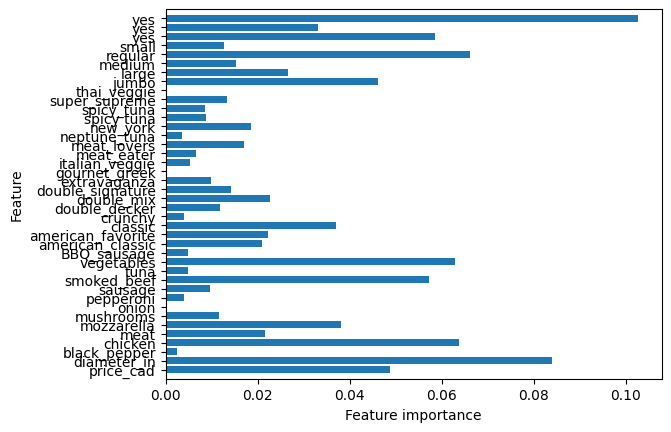

In [ ]:
# plot feature importances
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    # Define y_names here, assuming 'X' has column names you want to use
    y_names = X.columns
    plt.yticks(np.arange(n_features), y_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC

## Testing/Training Split Evaluation

In [ ]:
# polynomial kernel
# accuracy
svmPoly1 = SVC(kernel='poly', C=10).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmPoly1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmPoly1.score(X_test, y_test)))

Accuracy on training set: 0.59
Accuracy on test set: 0.42


**Had to use Gemini suggestion because the original code produces value error b/c mismatched classes**

In [ ]:
# polynomial kernel
# classification report
print("Accuracy on training set: {:.3f}".format(svmPoly1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svmPoly1.score(X_test, y_test)))

# Get the unique class labels from your y_test data
unique_classes = y_test.unique()

# Generate target names dynamically
target_names = [f"class {i+1}" for i in range(len(unique_classes))]

print(classification_report(y_test, svmPoly1.predict(X_test),
                            target_names=target_names)) # Use dynamically generated target names

Accuracy on training set: 0.594
Accuracy on test set: 0.424
              precision    recall  f1-score   support

     class 1       0.57      0.67      0.62         6
     class 2       0.20      0.17      0.18         6
     class 3       0.62      1.00      0.76         8
     class 4       0.00      0.00      0.00         5
     class 5       0.17      0.12      0.14         8

    accuracy                           0.42        33
   macro avg       0.31      0.39      0.34        33
weighted avg       0.33      0.42      0.36        33



In [ ]:
# radial basis function kernel
svmRBF1 = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF1.score(X_test, y_test)))

Accuracy on training set: 0.83
Accuracy on test set: 0.36


In [ ]:
# radial basis function kernel
# classification report
print("Accuracy on training set: {:.3f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svmRBF1.score(X_test, y_test)))

# Get the unique class labels from your y_test data
unique_classes = y_test.unique()

# Generate target names dynamically
target_names = [f"class {i+1}" for i in range(len(unique_classes))]

print(classification_report(y_test, svmRBF1.predict(X_test),
                            target_names=target_names)) # Use dynamically generated target names

Accuracy on training set: 0.833
Accuracy on test set: 0.364
              precision    recall  f1-score   support

     class 1       0.67      0.33      0.44         6
     class 2       0.20      0.33      0.25         6
     class 3       0.75      0.75      0.75         8
     class 4       0.33      0.40      0.36         5
     class 5       0.00      0.00      0.00         8

    accuracy                           0.36        33
   macro avg       0.39      0.36      0.36        33
weighted avg       0.39      0.36      0.36        33



## Parameter Selection with Grid Search


In [ ]:
# import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# import GridSearchCV and set ranges for C and gamma and create the paramter grid
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [ ]:
# polynomial kernel
gridPoly = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
gridPoly.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly.best_params_, gridPoly.best_score_))

In [ ]:
# radial basis function kernel
gridPoly = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
gridPoly.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly.best_params_, gridPoly.best_score_))

# **Feature Scaling**

## **Scale the features**

In [ ]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0) - #CODE DOESN'T RUN - ERROR HERE

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

SyntaxError: invalid syntax (<ipython-input-1-ff281add34e2>, line 5)

In [ ]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train  min_on_training).max(axis=0) - #CODE DOESN'T RUN - ERROR HERE

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

SyntaxError: invalid syntax (<ipython-input-28-9de5c3dc8550>, line 5)